In [4]:
## Function to do Wright-Fisher simulation with selection and a finite sample size
# using priors on Ne, s, and initial allele frequency
# Sample at two time points

# i is a dummy argument so that it can be used with sapply and parSapply
# f1min: the minimum for the initial allele frequency uniform prior
# f1max:
# smin: the minimum for the selection coefficient uniform prior
# smax:
# c1: the size of the first sample (in # chromosomes)
# c2: the size of the second sample (in # chromosomes)
# gen: the number of generations
# ne: a vector of possible Ne values. Simulation picks one to use.
# h: dominance effect
wfs <- function(i, f1min=f1min, f1max=f1max, smin=smin, smax=smax, c1=c1, c2=c2, gen=gen, ne=ne, h=h){ 
	# choose parameters for this simulation
	f1 <- runif(1, min=f1min, max=f1max) # starting allele frequency
	s <- runif(1, min=smin, max=smax) # selection coefficient
	if(length(ne)>1) thisne <- round(sample(ne, 1)) # ne has to be integer for binomial sampling
	if(length(ne)==1) thisne <- round(ne)
	
#	print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,thisne,x)/thisne
#		print(paste(x,p))
	}
	f2 <- p

	f1samp <- rbinom(1,c1,f1)/c1 # first sample allele frequency
	f2samp <- rbinom(1,c2,f2)/c2 # second sample allele frequency

	# calculate summary statistics (Foll et al. 2015 Molecular Ecology Resources)
#	stats <- sumstats(f1samp, f2samp, c1, c2, gen)
	
	# return values
#	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp, fsdprime=stats[1], fsiprime=stats[2])
	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp)
	return(out)
}


In [89]:
data=rep(1,1000)

Run with 0 generations

In [117]:
outputn=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=50, c2=50, gen=1, ne=200, h=0)
outputm=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=25, c2=25, gen=1, ne=50, h=0)
mito=as.data.frame(do.call(rbind, outputm))
mito$diffsamp=abs(mito$f1samp-mito$f2samp)
mito$difffreq=abs(mito$f1-mito$f2)
nuc=as.data.frame(do.call(rbind, outputn))
nuc$diffsamp=abs(nuc$f1samp-nuc$f2samp)
nuc$difffreq=abs(nuc$f1-nuc$f2)

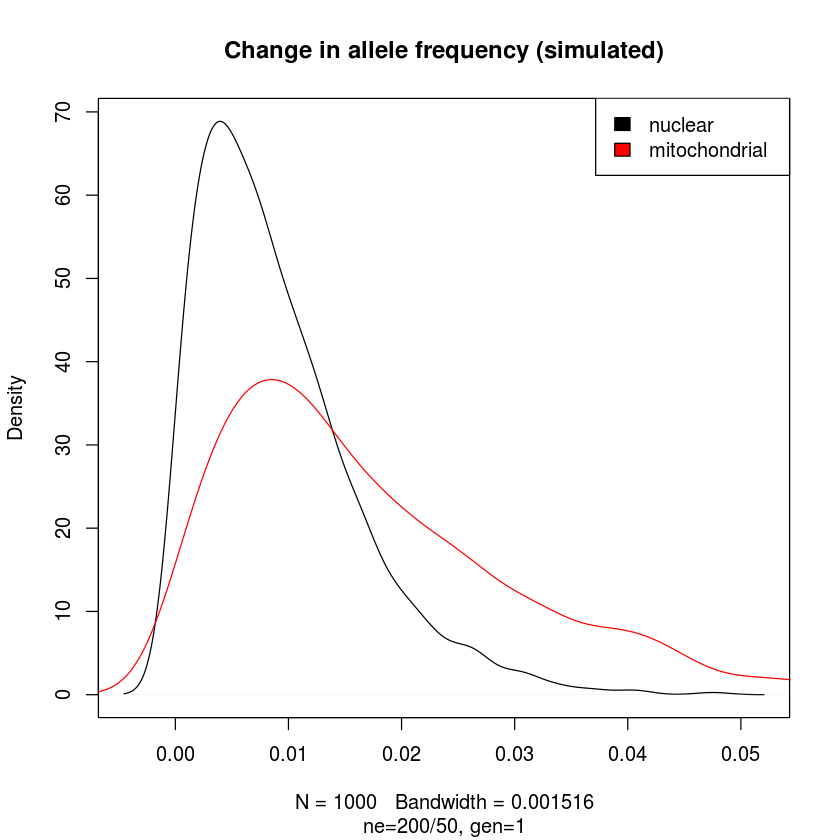

In [118]:
plot(density(nuc$difffreq), main="Change in allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$difffreq), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

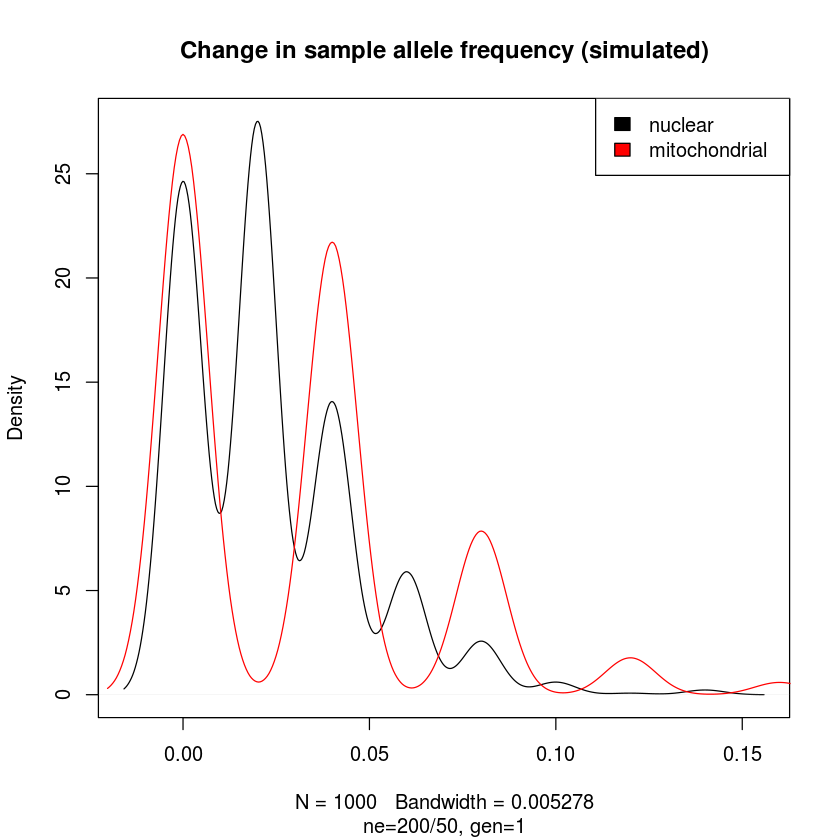

In [119]:
plot(density(nuc$diffsamp), main="Change in sample allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$diffsamp), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [86]:
outputn=lapply(data, wfs, f1min=0.05, f1max=0.5, smin=0, smax=0, c1=50, c2=50, gen=0, ne=200, h=0)
outputm=lapply(data, wfs, f1min=0.05, f1max=0.5, smin=0, smax=0, c1=25, c2=25, gen=0, ne=50, h=0)
mito=as.data.frame(do.call(rbind, outputm))
mito$diffsamp=abs(mito$f1samp-mito$f2samp)
mito$difffreq=abs(mito$f1-mito$f2)
nuc=as.data.frame(do.call(rbind, outputn))
nuc$diffsamp=abs(nuc$f1samp-nuc$f2samp)
nuc$difffreq=abs(nuc$f1-nuc$f2)

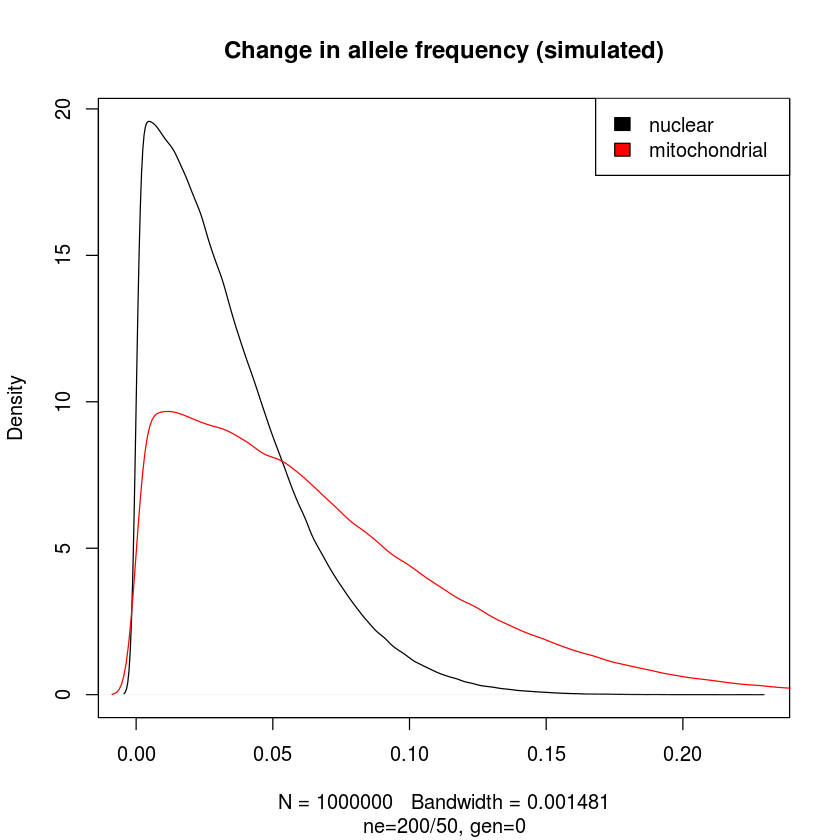

In [87]:
plot(density(nuc$difffreq), main="Change in allele frequency (simulated)", sub="ne=200/50, gen=0")
     lines(density(mito$difffreq), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

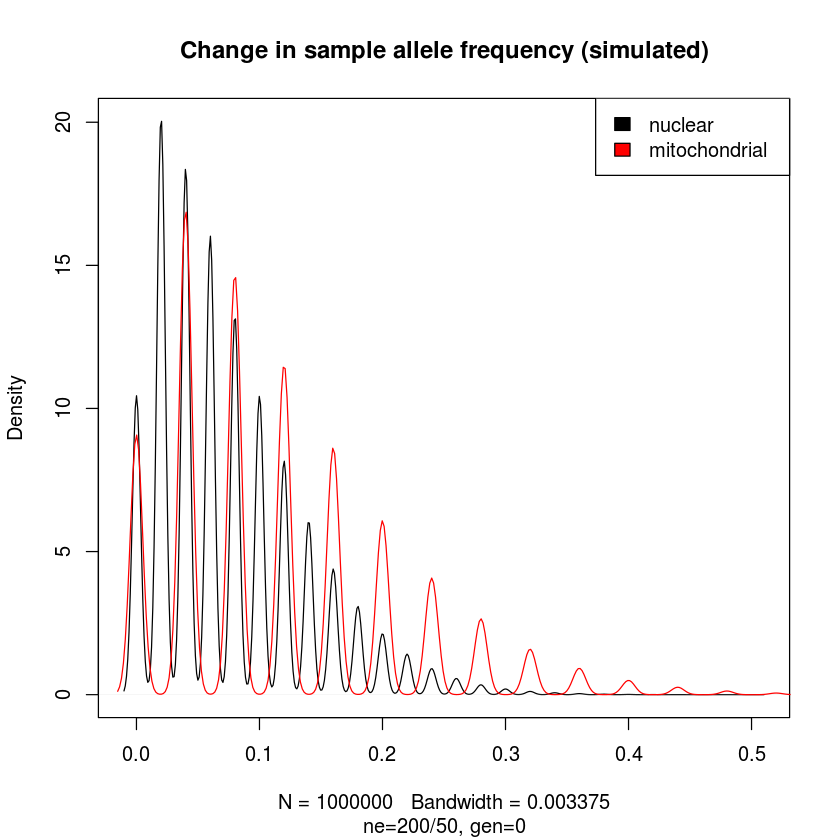

In [88]:
plot(density(nuc$diffsamp), main="Change in sample allele frequency (simulated)", sub="ne=200/50, gen=0")
     lines(density(mito$diffsamp), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

Get genotype probabilities, call a genotype based on the probabilities summ geno probs divide by number of chromosomes. 
Sum of RR+RA+AA/2N= f1samp
Sample the genotype probabilities, calculate f1samp, input that into the wright fisher simulations, then save the output. WE want to know if the allele frequency changes that we are seeing are similar to what we would expect due to drift given our f1samp. 
Do a bunch of times, save all the output. 
At some point we should look to see if our calculated allele frequencies are correct. Do about a million simulations. make sims null will help parallelize it. 
can we fit the null model to a distribution to get the ends. 
bootstrapping?
Look at the bootstrapping for the sfs, to get error bounds on fst or tajima's D? 

In [2]:
genoprobs=read.csv("/local/home/sarahgw/WGS/SNPS/All_mylu/snps/Candidate_SNPs_geno.csv", header=FALSE)

In [3]:
head(genoprobs)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399
GL429793,3619488,0.272212,0.499055,0.228733,0.272212,0.499055,0.228733,0.685719,0.314281,⋯,0.272212,0.499055,0.228733,0.272212,0.499055,0.228733,0.272212,0.499055,0.228733,NA
GL429805,5255331,0.254753,0.499955,0.245292,0.000051,0.504703,0.495246,0.254753,0.499955,⋯,0.504708,0.495243,0.000049,0.670862,0.329138,0.000000,0.000163,0.504646,0.495191,NA
GL429830,4776068,0.291388,0.496831,0.211781,0.291388,0.496831,0.211781,0.291388,0.496831,⋯,0.291388,0.496831,0.211781,0.291388,0.496831,0.211781,0.539785,0.460176,0.000039,NA
GL429833,4827830,0.294581,0.496344,0.209075,0.000000,0.228837,0.771163,0.542734,0.457227,⋯,0.000000,0.129200,0.870800,0.703620,0.296380,0.000000,0.542734,0.457227,0.000039,NA
GL429835,4132453,0.267540,0.499405,0.233055,0.517222,0.482733,0.000045,0.267540,0.499405,⋯,0.517152,0.482669,0.000179,0.267540,0.499405,0.233055,0.267540,0.499405,0.233055,NA
GL429848,4054536,0.284989,0.497709,0.217302,0.533824,0.466135,0.000041,0.000061,0.533809,⋯,0.284989,0.497709,0.217302,0.000077,0.533800,0.466123,0.533818,0.466130,0.000051,NA


In [5]:
#samples=read.table("/local/home/sarahgw/WGS/Sequences/filelists/All_Mylu.filelist", header=FALSE)

In [4]:
# 23 - 42
NJU_genoprobs=genoprobs[,69:128] 
# 64 - 85
NYU_genoprobs=genoprobs[,192:257] 
# 113 - 132
VTU_genoprobs=genoprobs[,339:398]

In [3]:
NCOL(NJU_genoprobs)
NCOL(NYU_genoprobs)
NCOL(VTU_genoprobs)

[1] 60

[1] 66

[1] 60

Turn this into a function so you can repeat it and specify which population you want to use. 
Run it with malin's funciton, fill in the actual size of populations. Get the sample allele freq for Exposed population, compare to what you have. 
Compare your actual minor allele frequencies to these ones. 
I'm confused how I have genotype probabilities for samples where I didnt think we had coverage???
Figure out how to display the distribution of input the allele frequencies--Maybe just plot the change? as density?

In [12]:
##Loop through differnet snps in output from angsd
#take groups of three probabilities and use that to sample from possible genotypes
#count number of times minor allele is found, divide by N*2 
#populate f1samps dataframe to feed to wfs by samp

gp2af=function(POP_genoprobs){ 
     genos=c("0", "1", "2")
gp2afi=function(v){
    f1samps=vector()
    genosamp=vector()
    for(i in seq(1,length(v),3)){
        three_probs=v[i:(i+2)]
            genosamp[i]=sample(genos, size = 1, prob=three_probs)
            genosamp=as.numeric(as.character(genosamp)) 
            f1samps=(sum(genosamp, na.rm=TRUE))/(2*(length(v)/3))          
    }  
    return(f1samps)
}
    apply(POP_genoprobs, 1, gp2afi)
    }

In [9]:
replicate(10, gp2af(NJU_genoprobs))

0.350,0.450,0.425,0.425,0.375,0.500,0.350,0.500,0.425,0.525
0.325,0.400,0.500,0.425,0.375,0.550,0.450,0.575,0.450,0.425
0.450,0.375,0.450,0.475,0.500,0.475,0.475,0.475,0.525,0.525
0.425,0.300,0.475,0.375,0.400,0.350,0.550,0.350,0.350,0.325
0.550,0.575,0.600,0.550,0.600,0.600,0.600,0.475,0.450,0.525
0.325,0.425,0.400,0.350,0.450,0.450,0.475,0.425,0.400,0.325
0.425,0.275,0.375,0.400,0.400,0.300,0.225,0.375,0.400,0.325
0.550,0.425,0.550,0.425,0.475,0.425,0.500,0.425,0.425,0.500
0.525,0.525,0.450,0.450,0.500,0.475,0.550,0.350,0.475,0.550
0.375,0.325,0.375,0.400,0.375,0.350,0.425,0.400,0.275,0.300


In [53]:
system.time(replicate(10, gp2af(NJU_genoprobs)))

   user  system elapsed 
  0.442   0.000   0.443 

In [21]:
system.time(replicate(10, gp2af(NJU_genoprobs)))

   user  system elapsed 
  0.103   0.000   0.103 

In [24]:
## Function to do Wright-Fisher simulation with selection and a finite sample size
# using priors on Ne and s
# and specify initial sample allele frequency, f1samp (compare to wfs.r, which sets a prior on initial true allele freq f1)
# Sample at two time points

# f1samp: the initial sample allele frequency. Initial true allele freq will be sampled with this constraint.
# smin: the minimum for the selection coefficient uniform prior
# smax:
# c1: the size of the first sample (in # chromosomes)
# c2: the size of the second sample (in # chromosomes)
# gen: the number of generations
# ne: a vector of possible Ne values. Simulation picks one to use.
# h: dominance effect

wfs_byf1samp <- function(f1samp=0.5, smin=-1, smax=1, c1=58, c2=48, gen=20, ne=100, h=0.5){ 
	tol <- .Machine$double.eps^0.5 # tolerane for equality. default tolerance in all.equal

	# make sure f1samp is possible given initial sample size (c1)
	# test whether difference from a possible sample size is less than tol
	if(!any(abs(f1samp - ((0:c1)/c1)) < tol)) return(NA)
        #stop(paste('f1samp=', f1samp, 'not possible given c1=', c1))

	# choose parameters for this simulation
		s <- runif(1, min=smin, max=smax) # selection coefficient
	if(length(ne)>1) thisne <- round(sample(ne, 1)) # ne has to be integer for binomial sampling
	if(length(ne)==1) thisne <- round(ne)

	# choose initial population frequency
	# brute force method: keep picking possible f1s until one produces the correct f1samp
	thisf1 <- -100
	while(abs(thisf1 - f1samp) >= tol){
		f1 <- runif(1, min=0, max=1) # pick a starting allele frequency
		thisf1 <- rbinom(1,c1,f1)/c1 # pick a first sample allele frequency that corresponds
	}
	
#	print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,thisne,x)/thisne
#		print(paste(x,p))
	}
	f2 <- p

	f2samp <- rbinom(1,c2,f2)/c2 # second sample allele frequency

	# calculate summary statistics (Foll et al. 2015 Molecular Ecology Resources)
#	stats <- sumstats(f1samp, f2samp, c1, c2, gen)
	
	# return values
#	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp, fsdprime=stats[1], fsiprime=stats[2])
	#out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp)
	out=f2samp
        return(out)
}




Run this part in a screen not in a notebook:
source("~/WNS_Notebooks/WNS_WGS/Scripts/AlleleFreqChange_Functions.r")
genoprobs=read.csv("/local/home/sarahgw/WGS/SNPS/All_mylu/snps/Candidate_SNPs_geno.csv", header=FALSE)
NJU_genoprobs=genoprobs[,69:128] 
NYU_genoprobs=genoprobs[,192:257]
VTU_genoprobs=genoprobs[,339:398]

In [46]:
NJU_f1samp=as.data.frame(replicate(1000000, gp2af(NJU_genoprobs)))
NYU_f1samp=as.data.frame(replicate(1000000, gp2af(NYU_genoprobs)))
VTU_f1samp=as.data.frame(replicate(1000000, gp2af(VTU_genoprobs)))

In [47]:
NYE_f2samp=apply(NYU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=44, c2=40, gen=1, ne=100, h=0)
NJE_f2samp=apply(NJU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=40, c2=44, gen=1, ne=100, h=0)
VTE_f2samp=apply(VTU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=40, c2=54, gen=1, ne=100, h=0)

In [48]:
NYdiff=NYE_f2samp-NYU_f1samp
NYdiff=apply(NYdiff, c(1,2), as.numeric)

VTdiff=VTE_f2samp-VTU_f1samp
VTdiff=apply(VTdiff, c(1,2), as.numeric)

NJdiff=NJE_f2samp-NJU_f1samp
NJdiff=apply(NJdiff, c(1,2), as.numeric, as.character)

In [49]:
diff_list=list(NYdiff, NJdiff, VTdiff)

In [50]:
NJNYVT=apply(simplify2array(diff_list), 1:2, mean)

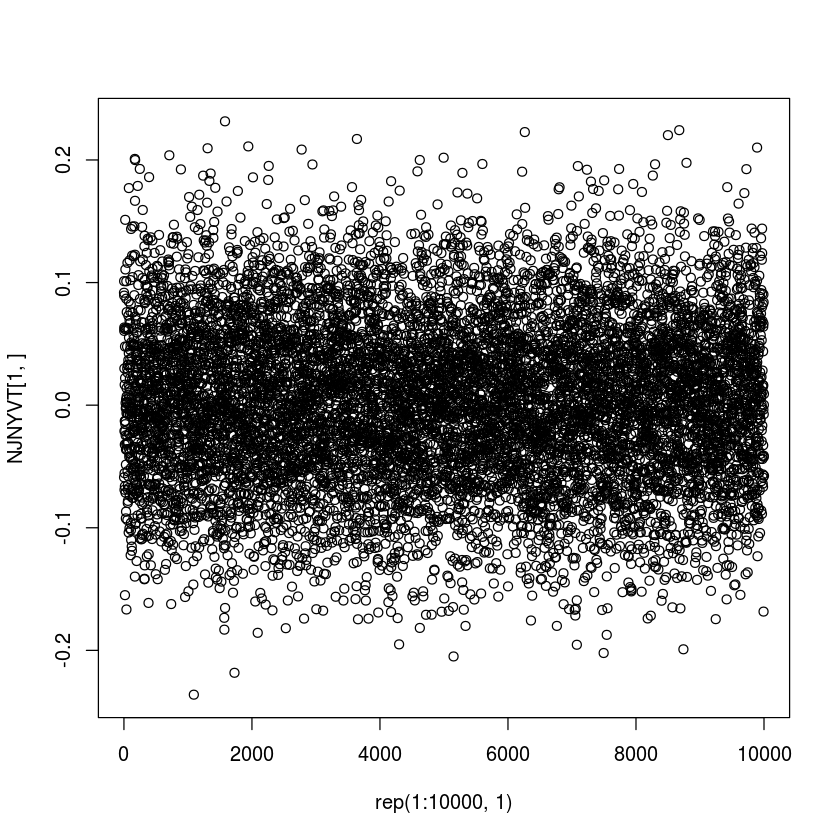

In [52]:
plot(rep(1:10000,1), NJNYVT[1,])

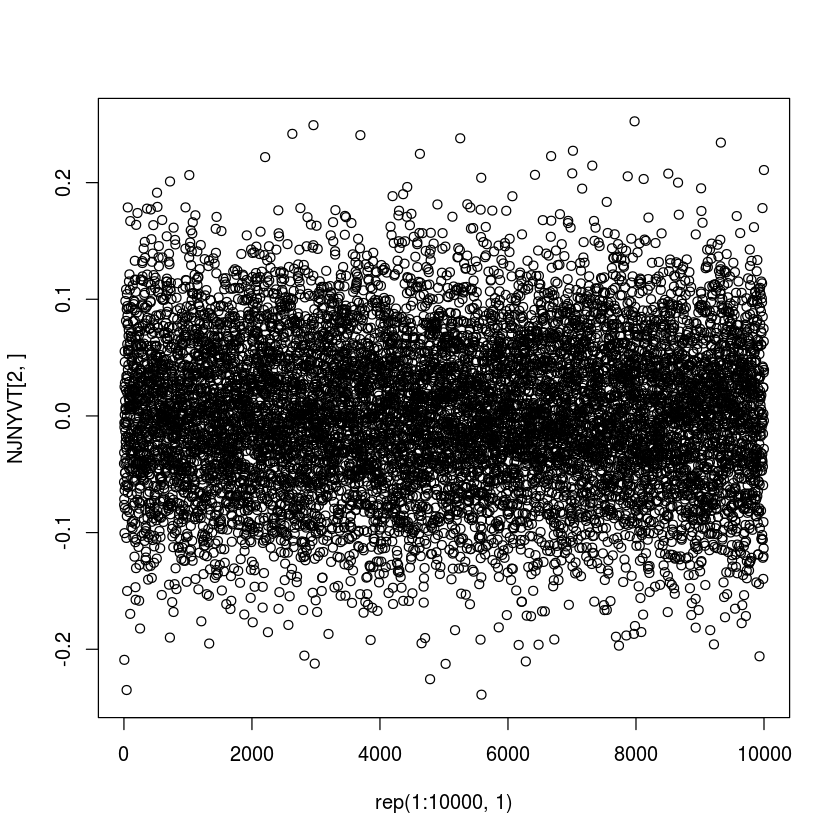

In [53]:
plot(rep(1:10000,1), NJNYVT[2,])

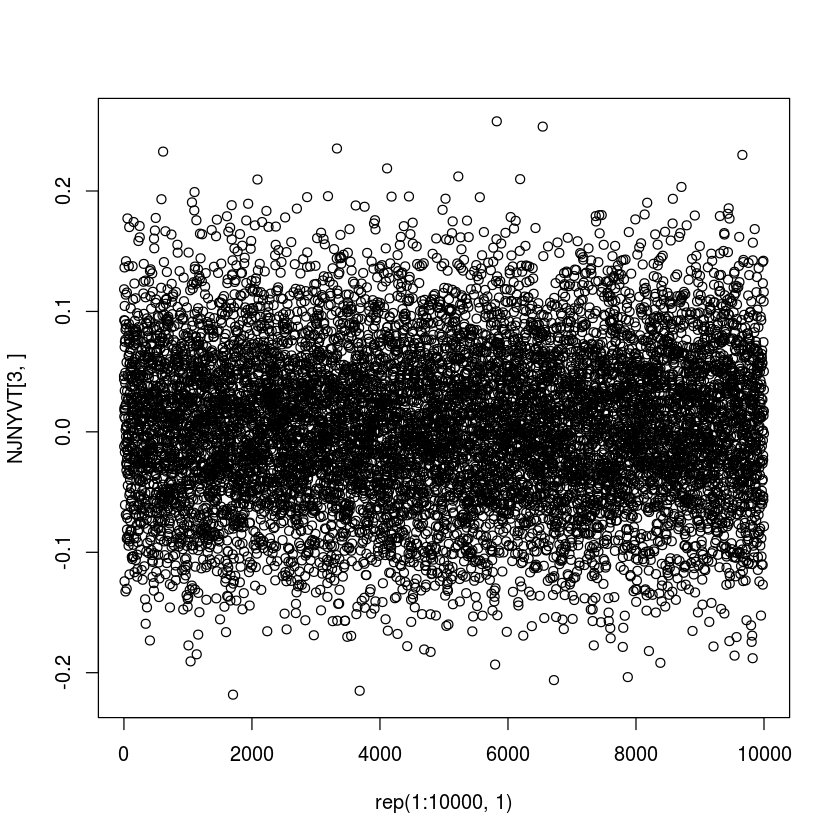

In [54]:
plot(rep(1:10000,1), NJNYVT[3,])

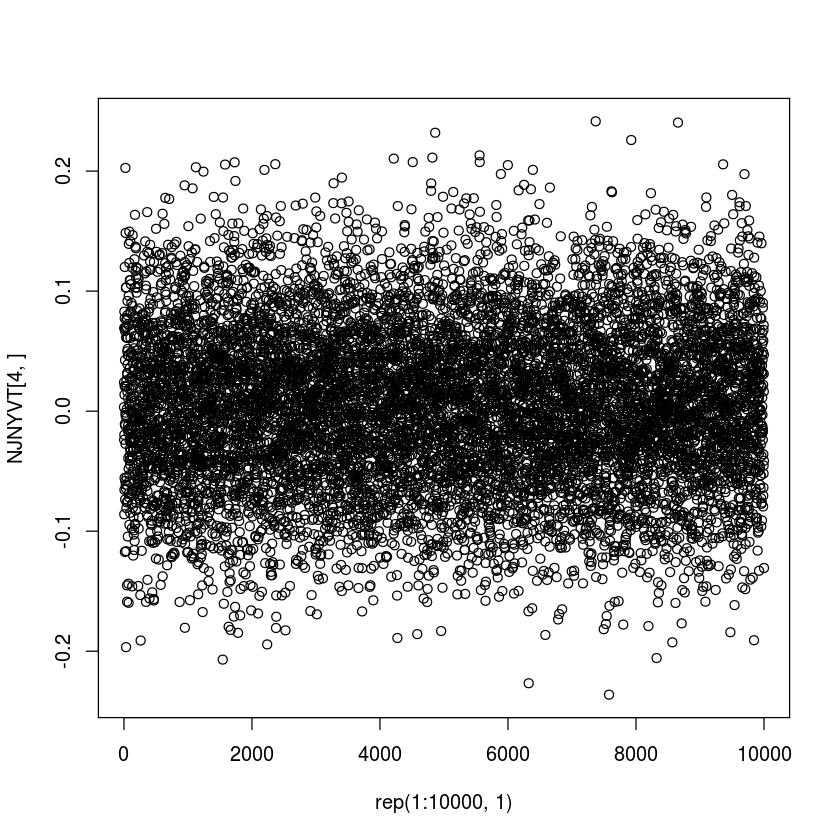

In [55]:
plot(rep(1:10000,1), NJNYVT[4,])

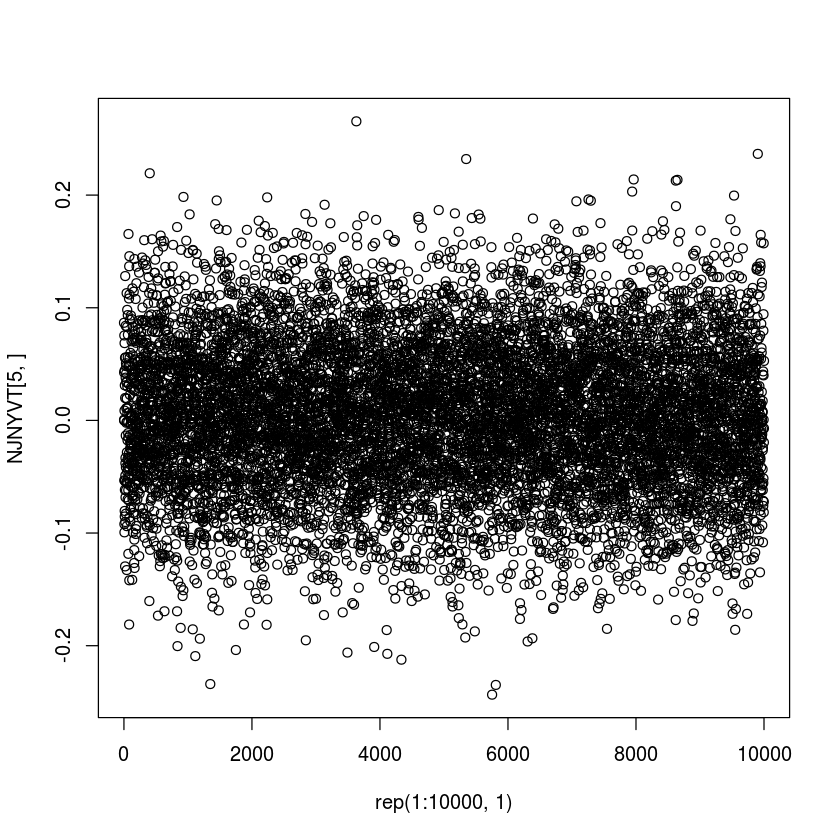

In [56]:
plot(rep(1:10000,1), NJNYVT[5,])

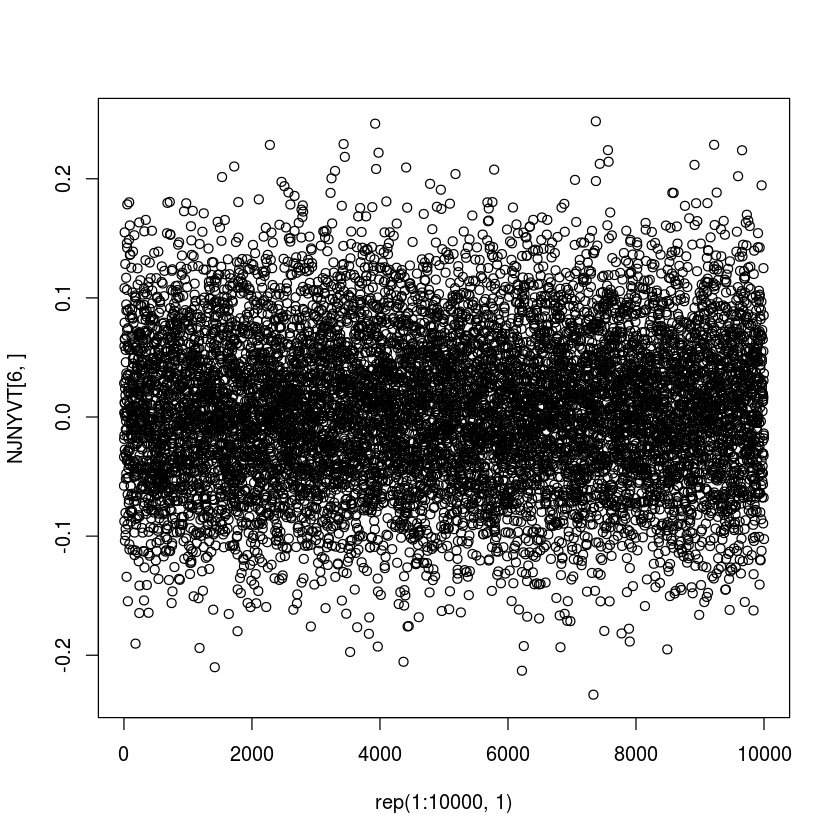

In [57]:
plot(rep(1:10000,1), NJNYVT[6,])

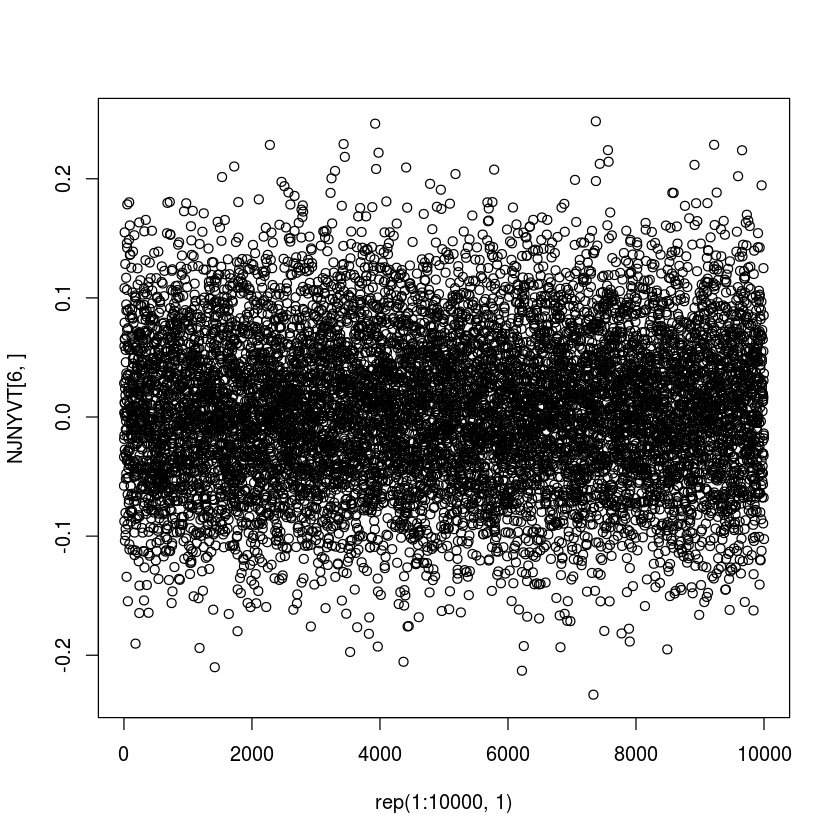

In [58]:
plot(rep(1:10000,1), NJNYVT[6,])

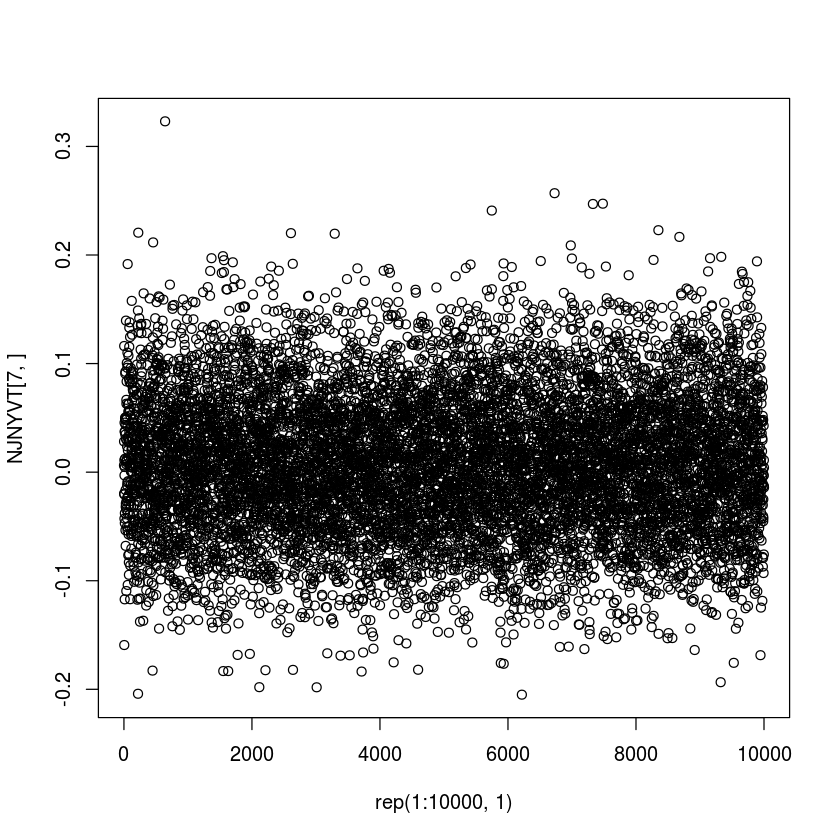

In [59]:
plot(rep(1:10000,1), NJNYVT[7,])

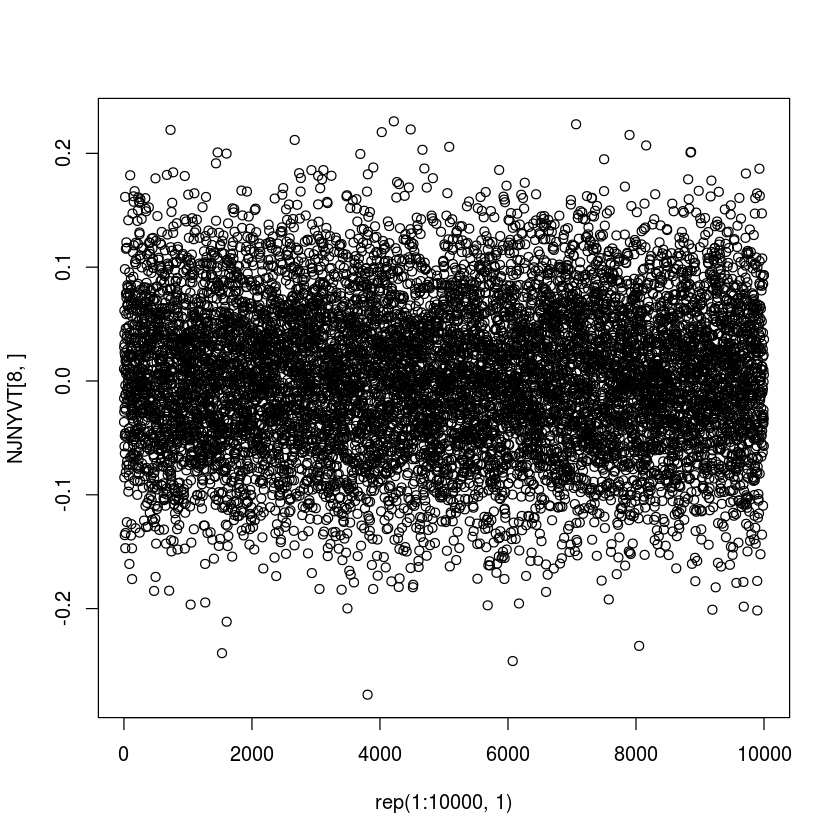

In [60]:
plot(rep(1:10000,1), NJNYVT[8,])

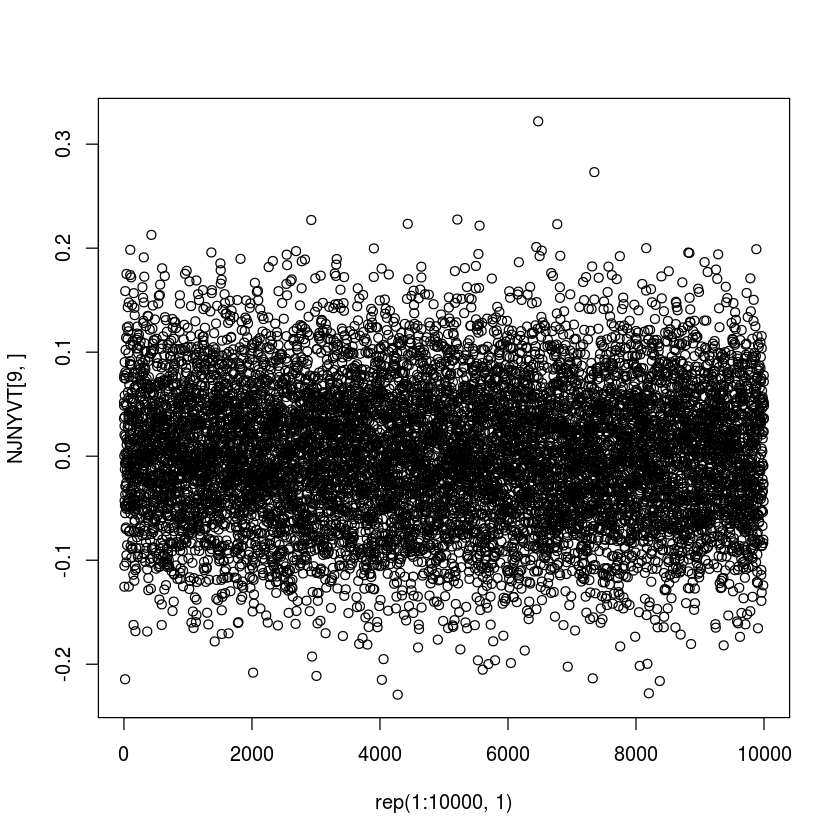

In [61]:
plot(rep(1:10000,1), NJNYVT[9,])

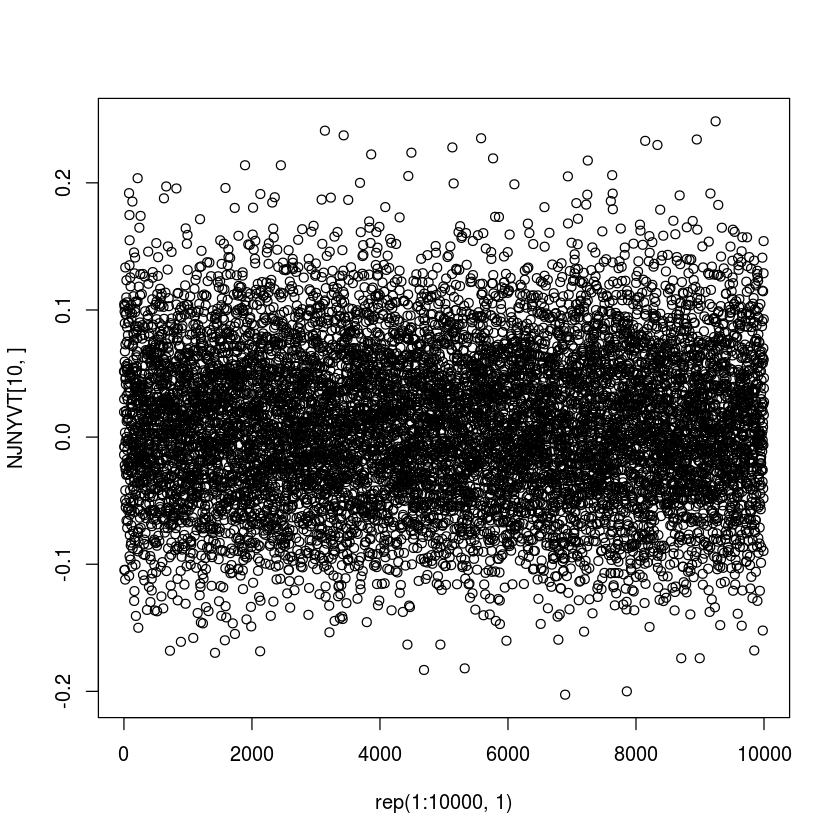

In [62]:
plot(rep(1:10000,1), NJNYVT[10,])

Choose a genotype based on the geno probs
iinput the sample allele frequency into the simulation
calculate f2 
use that to calculate sample allele frequency, does this match what we actually see
DO THIS FOR THE SNPS of interest. 
Test on some that arent outliers. 


Questions:
Do I need to repeate wfs as well? or is picking new genotypes each time enough replication?
Should we worry about how often we have a sample allele frequency that isn't possible with the size of the populations? Am I missing something in terms of correcting for this?

Again, how to account for 3 populations, I can take average but they don't necessarily line up.

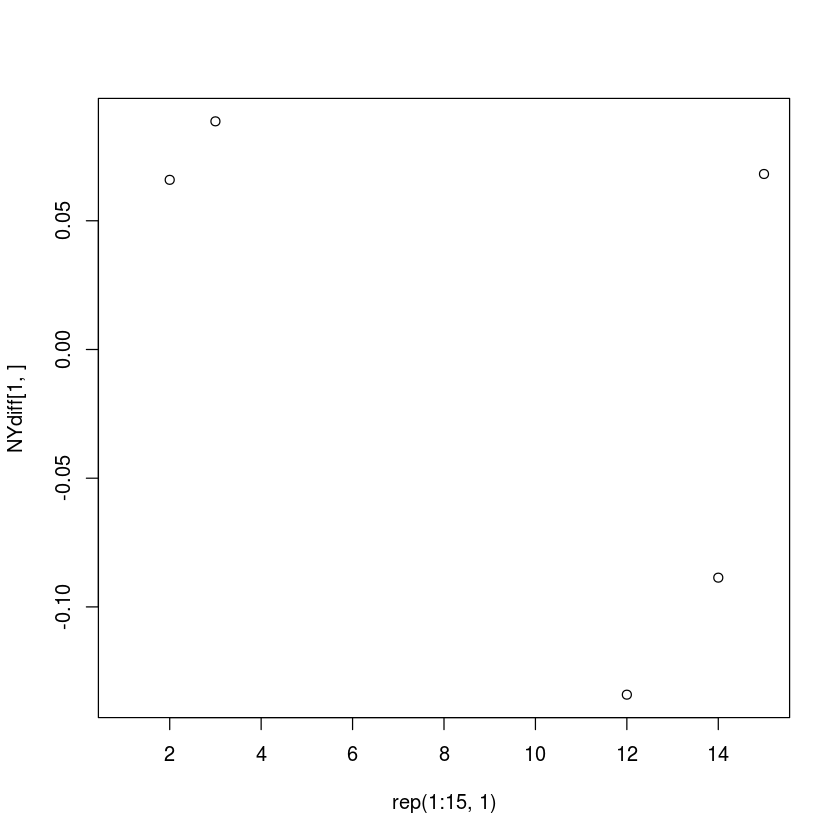

In [ ]:
NCOL